# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

### Integrates de Grupo:

* Wilder Serdan (wserdan@gmail.com)
* Oscar Ramirez (oscar.ramirez.guachalla@gmail.com)
* Ruth Daniela Villalobos (ruthdanivillalobos@gmail.com)

# Tabla de Contenido

1. [Introduccion](#1-introducción)
    * [Objetivos del negocio](#11-objetivo-del-negocio)
2. [Configuracion e Instalacion](#2-configuracion-e-instalacion)
    * [Instalaciones Necesarias](#instalaciones-necesarias)
    * [Librerías Generales](#librerías-generales)
    * [Librerías Machine Learning](#librerias-machine-learning)
    * [Librerías Estadística](#librerias-estadística)
    * [Alertas](#alertas)
    * [Definición de Números de Decimales](#definición-de-número-de-decimales)
3. [Entendimiento de los Datos](#3-entendimiento-de-los-datos)  
4. [Manipulacion y Limpieza de Datos](#4-manipulación-y-limpieza-de-datos)
    * [Cargado y Visualización de Datos](#cargado-y-visualización-de-datos)
    * [Evaluación Inicial](#evaluación-inicial)
	    * [Campos Categóricos](#campos-categóricos)
	    * [Correlación](#correlación)
	    * [Correñación entre variables categóricas y numericas](#correlación-entre-variables-categóricas-y-numéricas)
	    * [Datos Faltantes](#datos-faltantes)
	    * [Completado de Valores Nulos](#completado-de-valores-nulos)
	    * [Verificación de Valores Nulos](#verificación-de-valores-nulos)
    * [Normalidad](#normalidad)
    * [Droping Data](#droping-data)
	    * [Eliminación de Variables Codependientes](#eliminación-de-variables-codependientes)
	    * [Eliminación de variblaes por Multicolinealidad](#eliminación-de-variables-por-multicolinealidad)
	    * [Creación de Variable "TipoVecindario"](#creación-de-variable-tipovecindario)
    * [Outliers](#outliers)
        * [Outliers GrLivArea](#outliers-grlivarea)
	    * [Outliers PoolArea](#outliers-poolarea)
	    * [Outliers MiscVal](#outliers-miscval)
	    * [Outliers LotArea](#outliers-lotarea)
	    * [Outliers MasVnrArea](#outliers-masvnrarea)
    * [Derived Data](#derived-data)
	    * [Variables Dummy](#variables-dummy)
5. [Analisis de Datos](#5-análisis-de-datos)
6. [Preparacion de Datos y Modelado](#6-preparación-de-datos)
7. [Construccion-del-Modelo](#7-construcción-del-modelo)
8. [Conclusions y Observaciones](#8-conclusiones-y-observaciones)

# 1. Introducción 

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.
 
### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# 2. Configuración e Instalación

### Instalaciones Necesarias

In [31]:
!pip install impyute

### Librerías Generales

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns
import sys
from impyute.imputation.cs import mice

### Librerias Machine Learning

In [33]:
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error,make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OrdinalEncoder
from sklearn import metrics

### Librerias Estadística

In [34]:
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, kstest, norm,f_oneway
from scipy import stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

### Alertas

In [35]:
import warnings
warnings.filterwarnings('ignore')

### Definición de Número de Decimales

In [36]:
pd.options.display.float_format = '{:.2f}'.format 

# 3. Entendimiento de los Datos

| N° | Nombre Dato | Significado|   
|---|---|---|
| 1 | Id | Identificador de posición |
| 2 | MSSubClass | Identifica el tipo de vivienda objeto de la venta. |
| 3 | MSZoning | Identifica la clasificación de zonificación general de la venta. |
|   |    |                a.|
|   |    |                 b.|
| 4 | LotFrontage |  | 
| 5 | LotArea |  | 
| 6 | Street |  | 
| 7 | Alley |  | 
| 8 | LotShape |  | 
| 9 | LandContour |  | 
| 10 | Utilities |  | 
| 11 | LotConfig |  | 
| 12 | LandSlope |  | 
| 13 | Neighborhood |  | 
| 14 | Condition1 |  | 
| 15 | Contition2 |  | 
| 16 | BldgType |  | 
| 17 | HouseStyle |  | 
| 18 | OverallQual |  | 
| 19 | OveralCond |  |
| 20 | YearBuilt |  | 
| 21 | YearRemodAdd |  | 
| 22 | RoofStyle |  | 
| 23 | RoofMatl |  | 
| 24 | Exterior1st |  | 
| 25 | Exterior2nd |  | 
| 26 | MasVnrType |  | 
| 27 | MasVnrArea |  | 
| 28 | ExterQual |  | 
| 29 | ExterCond |  | 
| 30 | Foundation |  | 
| 31 | BsmtQual |  | 
| 32 | BsmtCond |  | 
| 33 | BsmtExposure |  | 
| 34 | BsmtFinType1 |  | 
| 35 | BsmtFinSF1 |  | 
| 36 | BsmtFinType2 |  | 
| 37 | BsmtFinSF2 |  | 
| 38 | BsmtUnfSF |  | 
| 39 | TotalBsmtSF |  | 
| 40 | Heating |  | 
| 41 | HeatingQC |  | 
| 42 | CentralAir |  | 
| 43 | Electrical |  | 
| 44 | 1stFlrSF |  | 
| 45 | 2ndFlrSF |  | 
| 46 | LowQualFinSF |  | 
| 47 | GrLivArea |  | 
| 48 | BsmtFullBath |  | 
| 49 | BsmtHalfBath |  | 
| 50 | FullBath |  | 
| 51 | HalfBath |  | 
| 52 | BedroomAbvGr |  | 
| 53 | KitchenAbvGr |  | 
| 54 | KitchenQual |  | 
| 55 | TotRmsAbvGrd |  | 
| 56 | Functional |  | 
| 57 | Fireplaces |  | 
| 58 | FireplaceQu |  | 
| 59 | GarageType |  | 
| 60 | GarageYrBlt |  | 
| 61 | GarageFinish |  | 
| 62 | GarageCars |  | 
| 63 | GarageArea |  | 
| 64 | GarageQual |  | 
| 65 | GarageCond |  | 
| 66 | PavedDrive |  | 
| 67 | WoodDeckSF |  | 
| 68 | OpenPorchSF |  | 
| 69 | EnclosedPorch |  | 
| 70 | 3SsnPorch |  | 
| 71 | ScreenPorch |  | 
| 72 | PoolArea |  | 
| 73 | PoolQC |  | 
| 74 | Fence |  | 
| 75 | MiscFeature |  | 
| 76 | MiscVal |  | 
| 77 | MoSold |  | 
| 78 | YrSold |  | 
| 79 | SaleType |  | 
| 80 | SaleCondition |  | 
| 81 | SalePrice |  | 


#### Outliers GrLivArea

# 4. Manipulación y Limpieza de datos

### Cargado y Visualización de Datos 

In [7]:
data=pd.read_csv("_data/dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


### Evaluación Inicial

#### Campos Categóricos

In [12]:
num_to_cat=['MSSubClass']#, 'OverallQual', 'OverallCond']#, 'YearBuilt', 'YearRemodAdd','GarageYrBlt', 'MoSold', 'YrSold']
data_recat= data.copy()
data_recat[num_to_cat] = data_recat[num_to_cat].astype(str)
data_recat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Correlación


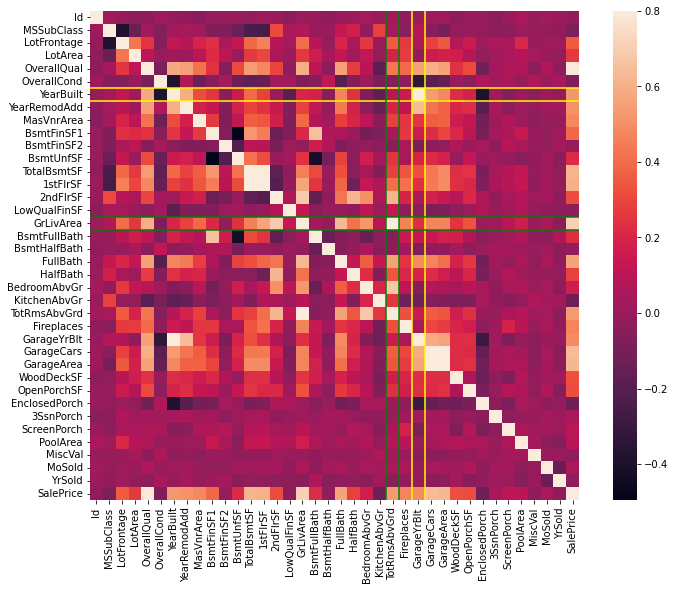

In [13]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)#, annot=True,fmt=".1f");
#YearBulit y GarageYrBlt
ax.hlines([6,7], colors="yellow",*ax.get_xlim())
ax.vlines([25,26], colors="yellow",*ax.get_ylim())

#TotalRooms
ax.hlines([16,17], colors="green",*ax.get_xlim())
ax.vlines([23,24], colors="green",*ax.get_ylim())

#### Correlación entre Variables Categóricas y Numéricas

In [14]:
def corrNumCat(d,c,n):
  encoder=LabelEncoder()
  encoder.fit(d[c])
  new=c + "_enc"
  d[new]=encoder.transform(d[c])
  corr=d[n].corr(d[new])
  #Esto podemos obviar si vamos a necesitar
  d.drop([new],axis=1, inplace=True)
  print("correlación entre ",c ," y ",n, " es: ",corr)
def corrCatCat(d,c1,c2):
  encoder1=LabelEncoder()
  encoder2=LabelEncoder()
  encoder1.fit(d[c1])
  encoder2.fit(d[c2])
  new1=c1 + "_enc"
  new2=c2 + "_enc"
  d[new1]=encoder1.transform(d[c1])
  d[new2]=encoder2.transform(d[c2])
  corr=d[new1].corr(d[new2])
  #Esto podemos obviar si vamos a necesitar
  d.drop([new1],axis=1, inplace=True)
  d.drop([new2],axis=1, inplace=True)
  print("correlación entre ",c1 ," y ",c2, " es: ",corr)

def CorrNumNum(d,n1,n2):
  x= d[n1]
  y= d[n2]
  corr=x.corr(y)
  print("correlación entre ",n1 ," y ",n2, " es: ",corr)

In [15]:
corrNumCat(data,"PoolQC","PoolArea")
corrCatCat(data,"GarageCond","GarageQual") # Ver esto
corrNumCat(data,"GarageCars","GarageArea")
corrNumCat(data,"FireplaceQu","Fireplaces")
corrCatCat(data_recat,"GarageCond","GarageQual") # Ver esto

correlación entre  PoolQC  y  PoolArea  es:  -0.8842503024390972
correlación entre  GarageCond  y  GarageQual  es:  0.5970304958136524
correlación entre  GarageCars  y  GarageArea  es:  0.8824754142814629
correlación entre  FireplaceQu  y  Fireplaces  es:  -0.7282891760748211
correlación entre  GarageCond  y  GarageQual  es:  0.5970304958136524


#### Datos Faltantes

In [16]:
nulos= pd.DataFrame(data.isnull().sum())
nulos= nulos[nulos[0]!=0]
nulos= nulos.sort_values(ascending=False,by=0)
#print("nulos",nulos.isnull().any())
print(nulos[nulos[0]!=0])
#print(x.to_markdown())
#ratio=(nulos/len(data.index)*100)
#print(ratio[ratio[0]!=0])

                 0
PoolQC        1453
MiscFeature   1406
Alley         1369
Fence         1179
FireplaceQu    690
LotFrontage    259
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1


#### Completado de Valores Nulos

In [17]:
def datosFaltantes(d,campo,x):
  d[campo]=d[campo].fillna(x)

In [18]:
camposMissData=["PoolQC","Alley","Fence","FireplaceQu","GarageType","GarageFinish",
                "GarageQual","GarageCond","BsmtExposure","BsmtFinType2","BsmtCond","BsmtFinType1",
                "BsmtQual","MasVnrType","MiscFeature"]

for campo in camposMissData:
  datosFaltantes(data_recat,campo,"No")  

# Campos especiales
datosFaltantes(data_recat,"MasVnrArea",0) 
datosFaltantes(data_recat,"GarageYrBlt",0)  # ver esto
datosFaltantes(data_recat,"Electrical","SBrkr") 

In [19]:
# "LotFrontage",
dataLot=data_recat[["LotFrontage","LotArea"]].copy()
#dataLot#=dataLot.reset_index()
imputados = pd.DataFrame(mice(dataLot.values))
imputados
data_recat["LotFrontage"]= imputados[0]

In [20]:
data_recat["LotFrontage"].isnull().any()

False

#### Verificación de Valores Nulos

In [21]:
nulos= pd.DataFrame(data_recat.isnull().sum())
nulos= nulos[nulos[0]!=0]

nulos= nulos.sort_values(ascending=False,by=0)
#print(nulos.sort_values(ascending=True, by=nulos[1]))
print(nulos[nulos[0]!=0])
#print(x.to_markdown())
ratio=(nulos/len(data_recat.index)*100)
print(ratio[ratio[0]!=0])

Empty DataFrame
Columns: [0]
Index: []
Empty DataFrame
Columns: [0]
Index: []


In [22]:
data_recat.isnull().sum().any()

False

### Normalidad

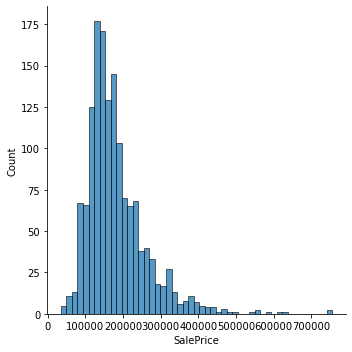

In [23]:
sns.displot(data['SalePrice'])

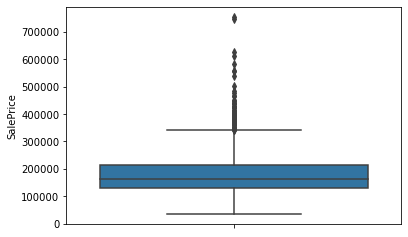

In [24]:
sns.boxplot(y = data["SalePrice"])
plt.show()

In [25]:
print("Asimetría: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())
shapiro(data['SalePrice'])

Asimetría: 1.882876
Kurtosis: 6.536282


ShapiroResult(statistic=0.869671642780304, pvalue=3.206247534576162e-33)

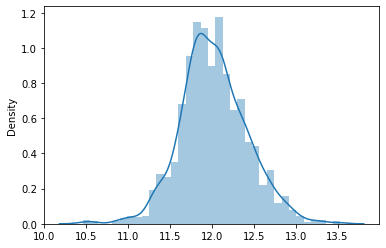

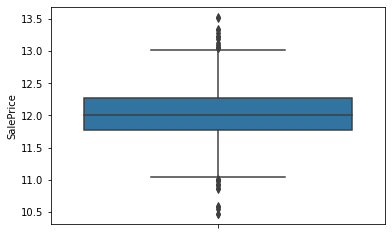

In [26]:
sns.distplot(x = np.log(data["SalePrice"]))
plt.show()
sns.boxplot(y = np.log(data["SalePrice"]))
plt.show()

In [28]:
data['SalePrice'] = np.log(data['SalePrice']) 

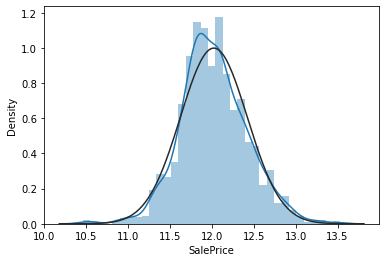

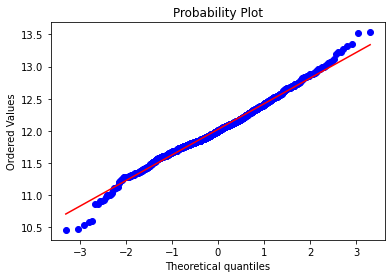

In [29]:
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [30]:
corrmat = campos_numericos.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

NameError: name 'campos_numericos' is not defined

### Droping Data

#### Eliminación de Variables Codependientes

In [37]:
data_recat.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [38]:
data_recat["TotalSF"]=data_recat["GrLivArea"]+data_recat["TotalBsmtSF"]
# GrLivArea ='1stFlrSF'+'2ndFlrSF'+'LowQualFinSF'   Por lo tanto podemos desechar sus componentes
# TotalBsmtSF =  'BsmtFinSF1' +'BsmtFinSF2'+ 'BsmtUnfSF  Por lo tanto podemos desechar sus componentes

data_recat["TotalBathrooms"]=data_recat["FullBath"]+(data_recat["HalfBath"]/2)+data_recat["BsmtFullBath"]+(data_recat["BsmtHalfBath"]/2)
data_recat["TotaPorchSF"]=data_recat["OpenPorchSF"]+data_recat["3SsnPorch"]+data_recat["EnclosedPorch"]+data_recat["ScreenPorch"]
data_recat["EdadCasa"]=2023-data_recat["YearBuilt"]
data_recat["EdadGarage"]=2023-data_recat["GarageYrBlt"]
data_recat["EdadVendido"]=2023-data_recat["YrSold"]
data_recat["EdadRemod"]=2023-data_recat["YearRemodAdd"]

In [39]:
columnas_a_borrar=["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath",
                   "OpenPorchSF","3SsnPorch","EnclosedPorch","ScreenPorch",
                  '1stFlrSF','2ndFlrSF','LowQualFinSF','TotalBsmtSF',
                   'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',"YearBuilt","GarageYrBlt","YrSold","YearRemodAdd",
                   
                   ]
data_recat=data_recat.drop(columnas_a_borrar,axis=1)

#### Eliminación de Variables por Multicolinealidad

In [44]:
# Por su alta correlación se elimina
CorrNumNum(data,"GarageYrBlt","YearBuilt") # esto ya esta transformado, habria que quitar
# Borrar  "GarageYrBlt"
corrNumCat(data,"PoolQC","PoolArea")
# Borrar  "PoolQC"
corrCatCat(data,"GarageCond","GarageQual")
# Borrar  "GarageCond"
corrNumCat(data,"GarageCars","GarageArea")
# Borrar  "GarageArea"
corrNumCat(data,"FireplaceQu","Fireplaces")
# Borrar  "Fireplaces"
CorrNumNum(data,"TotRmsAbvGrd","GrLivArea")
# Borrar  "TotRmsAbvGrd"

correlación entre  GarageYrBlt  y  YearBuilt  es:  0.825667484174342
correlación entre  PoolQC  y  PoolArea  es:  -0.8842503024390972
correlación entre  GarageCond  y  GarageQual  es:  0.5970304958136524
correlación entre  GarageCars  y  GarageArea  es:  0.8824754142814629
correlación entre  FireplaceQu  y  Fireplaces  es:  -0.7282891760748211
correlación entre  TotRmsAbvGrd  y  GrLivArea  es:  0.8254893743088431


In [45]:
data_recat.drop(["PoolQC"],axis=1, inplace=True)
data_recat.drop(["GarageCond"],axis=1, inplace=True)
data_recat.drop(["GarageArea"],axis=1, inplace=True)
data_recat.drop(["Fireplaces"],axis=1, inplace=True)
data_recat.drop(["TotRmsAbvGrd"],axis=1, inplace=True)

#### Creación de Variable "TipoVecindario"

In [46]:
alto=["StoneBr","NridgHt","NoRidge"]
bajo=["MeadowV","IDOTRR","BrDale"]
medio=[alto,bajo]
condiciones=[
            (data_recat["Neighborhood"].isin(alto)),
            (data_recat["Neighborhood"].isin(bajo)),
            (~data_recat["Neighborhood"].isin(medio))
             ]
valores=[2,0,1]
data_recat["TipoVecindario"]=np.select(condiciones,valores)
data_recat.groupby(["TipoVecindario"])["Neighborhood"].count()

TipoVecindario
0      70
1    1247
2     143
Name: Neighborhood, dtype: int64

### Outliers

#### Outliers GrLivArea

* Gráfica

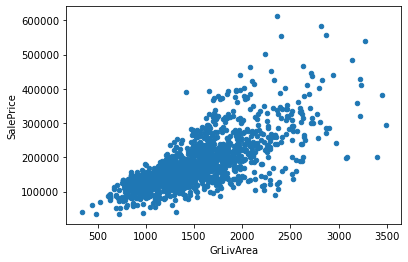

In [67]:
#scatter plot grlivarea/saleprice
def grafDisp(d,x,y):
  graf = pd.concat([d[y], d[x]], axis=1)
  graf.plot.scatter(x=x, y=y)
def borrarFilas(d,c,v):
  d.drop(d[d[c] >= v].index, inplace = True)

#scatter plot grlivarea/saleprice
grafDisp(data_recat,"GrLivArea","SalePrice")

* Borrado de Outliers

In [68]:
data_recat[data_recat["GrLivArea"]>4500][["GrLivArea","SalePrice"]]

,GrLivArea,SalePrice


In [69]:
borrarFilas(data_recat,'GrLivArea',4500)

* Gráfica Final

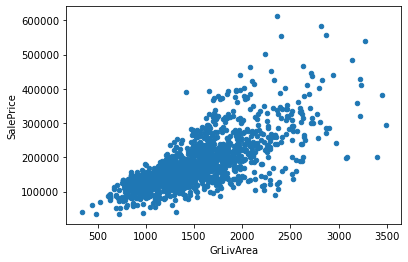

In [70]:
#scatter plot grlivarea/saleprice
grafDisp(data_recat,"GrLivArea","SalePrice")

#### Outliers PoolArea

* Gráfica Inicial

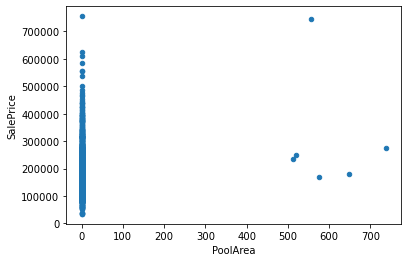

In [54]:
#scatter plot poolarea/saleprice
grafDisp(data_recat,"PoolArea","SalePrice")

* Borrado Outliers

In [55]:
data_recat[data_recat["PoolArea"]>500][["PoolArea","SalePrice"]]

,PoolArea,SalePrice
197,512,235000
810,648,181000
1170,576,171000
1182,555,745000
1386,519,250000
1423,738,274970


In [65]:
borrarFilas(data_recat,'PoolArea',500)

* Gráfica Final

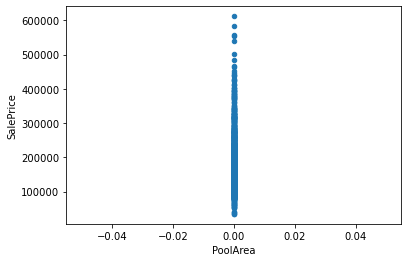

In [66]:
grafDisp(data_recat,"PoolArea","SalePrice")

#### Outliers MiscVal

* Gráfica Inicial

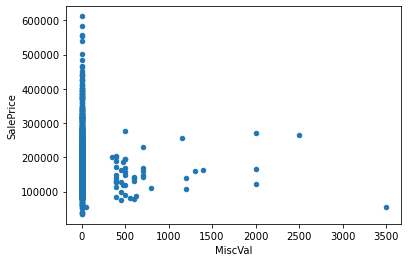

In [75]:
# Grafica miscval/salesprice
grafDisp(data_recat,"MiscVal","SalePrice")

* Borrado de Outliers

In [72]:
data_recat[data_recat["MiscVal"]>8000][["MiscVal","SalePrice"]]

,MiscVal,SalePrice
346,15500,151500
1230,8300,190000


In [73]:
borrarFilas(data_recat,'MiscVal',8000)

* Gráfica Final 

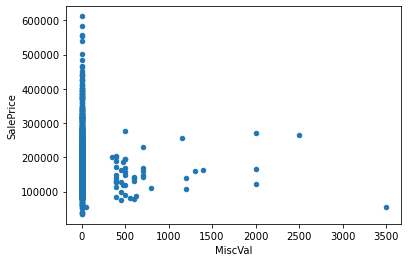

In [74]:
grafDisp(data_recat,"MiscVal","SalePrice")

#### Outliers LotArea

* Gráfica Inicial

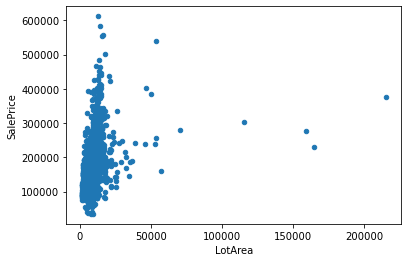

In [76]:
#scatter plot lotarea/saleprice
grafDisp(data_recat,"LotArea","SalePrice")

* Borrado de outliers

In [77]:
data_recat[data_recat["LotArea"]>100000][["LotArea","SalePrice"]]

,LotArea,SalePrice
249,159000,277000
313,215245,375000
335,164660,228950
706,115149,302000


In [78]:
borrarFilas(data_recat,'LotArea',100000)

* Gráfica Final

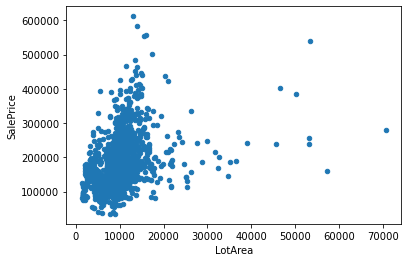

In [79]:
grafDisp(data_recat,"LotArea","SalePrice")

#### Outliers MasVnrArea

* Gráfica Inicial

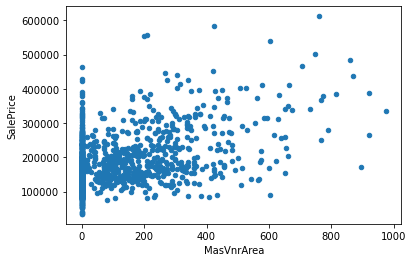

In [84]:
#scatter plot masvnrarea/saleprice
grafDisp(data_recat,"MasVnrArea","SalePrice")

* Borrado Outliers

In [83]:
data_recat[data_recat["MasVnrArea"]>1000][["LotArea","SalePrice"]]

,LotArea,SalePrice


In [85]:
borrarFilas(data_recat,'MasVnrArea',1000)

* Gráfica Final

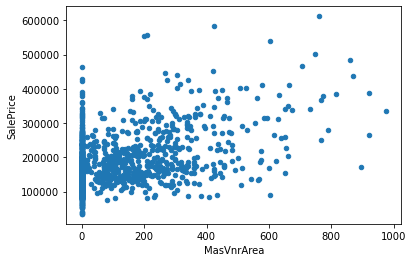

In [86]:
grafDisp(data_recat,"MasVnrArea","SalePrice")

(array([970., 171., 124.,  80.,  43.,  18.,  17.,   7.,   4.,   4.]),
 array([  0. ,  97.5, 195. , 292.5, 390. , 487.5, 585. , 682.5, 780. ,
        877.5, 975. ]),
 <BarContainer object of 10 artists>)

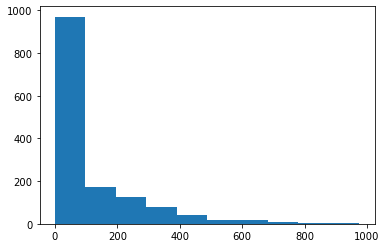

In [87]:
plt.hist(data_recat["MasVnrArea"])

### Derived Data

#### Variables Dummy

In [88]:
v1 =  ['Street']
def dummies(x):
    return x.map({'Pave': 1, "Grvl": 0})
data_recat[v1] = data_recat[v1].apply(dummies)

v2 =  ['Utilities']
def dummies(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})
data_recat[v2] = data_recat[v2].apply(dummies)

v3 =  ['CentralAir']
def dummies(x):
    return x.map({'Y': 1, "N": 0})
data_recat[v3] = data_recat[v3].apply(dummies)

# 5. Análisis de Datos

### Análisis Univariable

#### Numeric Data

#### Categorical Data

### Análisis Bivariblae

# 6. Preparación de Datos

### Definición de Datos

In [89]:
#campos_numericos=data_recat.select_dtypes(include=[np.number])
campos_categoricos=data_recat.select_dtypes(include=[np.object])
campos_categoricos.head()
#campos_categoricos.columns

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,No,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,No,Attchd,RFn,TA,Y,No,No,WD,Normal
1,20,RL,No,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,Y,No,No,WD,Normal
2,60,RL,No,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,Y,No,No,WD,Normal
3,70,RL,No,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,Y,No,No,WD,Abnorml
4,60,RL,No,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,Y,No,No,WD,Normal


In [90]:
onehot = pd.get_dummies(campos_categoricos, drop_first=True)
#plt.hist(data_recat["OverallQual"])

In [91]:
onehot.columns

Index(['MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20',
       'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=222)

In [92]:
dataOK = data_recat.copy()
dataOK = data_recat.drop(list(campos_categoricos.columns), axis=1)

dataOK = pd.concat([dataOK,onehot], axis=1)

In [93]:
dataOK.drop(["Id"],axis=1, inplace=True)
dataOK.shape

(1438, 247)

In [94]:
X = dataOK
y = np.log(X.SalePrice)
#y = X["SalePrice"]
X = X.drop("SalePrice",1)

In [95]:
X.shape

(1438, 246)

In [96]:
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
escalador.fit_transform(X)

array([[-0.2341111 , -0.28424959,  0.05906931, ..., -0.11876183,
         0.46538378, -0.30447523],
       [ 0.47923918, -0.06909006,  0.05906931, ..., -0.11876183,
         0.46538378, -0.30447523],
       [-0.09144104,  0.2396171 ,  0.05906931, ..., -0.11876183,
         0.46538378, -0.30447523],
       ...,
       [-0.18655441, -0.17348921,  0.05906931, ..., -0.11876183,
         0.46538378, -0.30447523],
       [-0.09144104, -0.04719992,  0.05906931, ..., -0.11876183,
         0.46538378, -0.30447523],
       [ 0.24145576, -0.00603896,  0.05906931, ..., -0.11876183,
         0.46538378, -0.30447523]])

### Splitting Data into Train Test

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size = 0.2, random_state=34)

In [98]:
X_test.shape

(288, 246)

In [99]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

Text(0.5, 0, 'Random Forest Feature Importance')

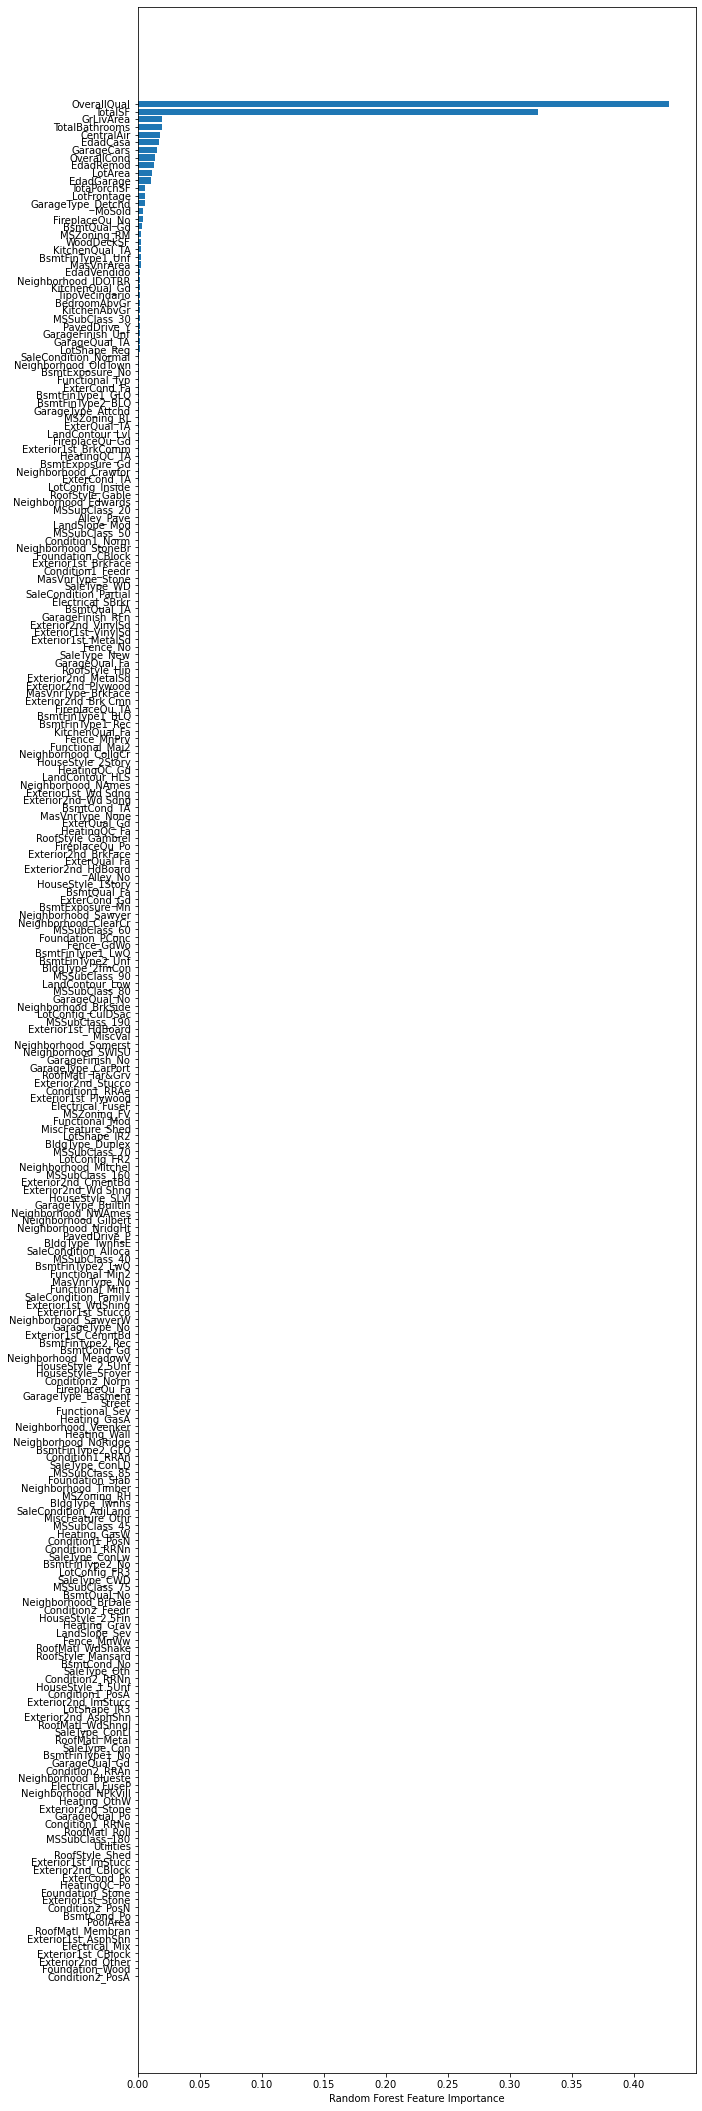

In [100]:
plt.rcParams.update({'figure.figsize': (10, 38)})
plt.rcParams.update({'font.size': 10})
#plt.barh(X.columns, rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# 7. Construcción del Modelo

### Regresión Lineal

In [101]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

# metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train_lr)
print("R2 Train Score: ", r2_train_lr)
# metric_lr.append(r2_train_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
print("Mean Squared Train Error Train: ", mse_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
print("Mean Squared Train Error Test: ", mse_test_lr)
#metric_lr.append(mse_train_lr**0.5)

R2 Train Score:  0.9519121153301198
Mean Squared Train Error Train:  0.007275644692377993
Mean Squared Train Error Test:  0.018492935505615246


### Ridge Regression

In [103]:
parametros = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1,3,5,7,9,10,20,50,100,500,1000]}

In [104]:
ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = parametros, scoring= 'neg_mean_absolute_error', cv = folds,return_train_score=True,verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9,
                                   1, 3, 5, 7, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10}
-0.07846541551744501


In [106]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.02,0.00,0.01,0.00,0.00,{'alpha': 0.0001},-0.08,-0.10,-0.09,-0.09,...,-0.09,0.01,17,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
1,0.02,0.00,0.01,0.00,0.00,{'alpha': 0.001},-0.08,-0.10,-0.09,-0.09,...,-0.09,0.01,16,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
2,0.01,0.00,0.01,0.00,0.01,{'alpha': 0.01},-0.08,-0.10,-0.09,-0.09,...,-0.09,0.01,15,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
3,0.01,0.00,0.01,0.00,0.10,{'alpha': 0.1},-0.08,-0.09,-0.09,-0.09,...,-0.08,0.01,14,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
4,0.03,0.02,0.01,0.00,0.30,{'alpha': 0.3},-0.08,-0.09,-0.08,-0.09,...,-0.08,0.01,13,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
5,0.01,0.00,0.00,0.00,0.50,{'alpha': 0.5},-0.07,-0.09,-0.08,-0.09,...,-0.08,0.01,12,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
6,0.01,0.00,0.00,0.00,0.70,{'alpha': 0.7},-0.07,-0.09,-0.08,-0.09,...,-0.08,0.01,11,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
7,0.01,0.00,0.00,0.00,0.90,{'alpha': 0.9},-0.07,-0.09,-0.08,-0.08,...,-0.08,0.01,9,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
8,0.01,0.00,0.00,0.00,1,{'alpha': 1},-0.07,-0.09,-0.08,-0.08,...,-0.08,0.01,8,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
9,0.01,0.00,0.00,0.00,3,{'alpha': 3},-0.07,-0.09,-0.08,-0.08,...,-0.08,0.00,6,-0.07,-0.06,-0.06,-0.06,-0.07,-0.06,0.00


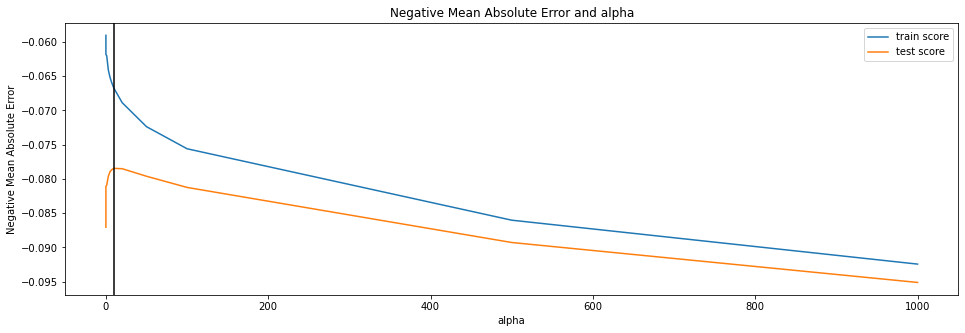

In [107]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
#mejor=int(model_cv.best_params_[1])

plt.axvline(x = model_cv.best_params_['alpha'], color = 'black', label = 'best')
plt.show()

In [108]:
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 4.46002004e-04,  5.11363584e-06,  2.30678601e-02,  9.23439548e-03,
        4.66586153e-02,  4.27436924e-02,  3.14484902e-05,  6.26380570e-02,
        1.24522203e-04, -3.78216956e-03, -4.05750978e-02,  3.29402325e-02,
        1.06492313e-04,  0.00000000e+00,  3.30904348e-06, -5.02503497e-04,
        1.21506125e-04,  3.71561317e-02,  1.22067723e-04, -2.06571852e-03,
       -2.18533749e-05,  3.32449040e-03, -9.41277970e-04,  6.08755050e-02,
       -4.09358414e-02, -1.31971417e-02, -3.82092936e-03,  1.10050344e-02,
       -3.10547243e-02, -2.72204278e-03,  6.54941115e-03,  2.52919847e-02,
       -2.00605001e-03,  4.71453858e-02, -9.96838037e-04,  2.01078982e-03,
        4.14483917e-03, -5.95859278e-03,  6.12309483e-02,  3.27787662e-02,
        6.98702097e-02,  4.67933359e-02, -5.04661492e-03, -2.03917580e-03,
        5.34486594e-03,  8.38853917e-04,  3.48768248e-03,  1.34552944e-02,
       -2.06818201e-02, -2.79601785e-03,  2.01575571e-02, -2.04933588e-02,
       -1.20881748e-02, -

In [109]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

# metric_lr = []
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print("R2 Train Score: ", r2_train_ridge)
# metric_lr.append(r2_train_lr)

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
print("Mean Squared Train Error Train: ", mse_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
print("Mean Squared Train Error Test: ", mse_test_ridge)
#metric_lr.append(mse_train_lr**0.5)

R2 Train Score:  0.9401331629301428
Mean Squared Train Error Train:  0.009057787390044689
Mean Squared Train Error Test:  0.013658096599928553


### Lasso Regression

In [110]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,param_grid = parametros,scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9,
                                   1, 3, 5, 7, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.10,0.03,0.01,0.00,0.00,{'alpha': 0.0001},-0.07,-0.09,-0.08,-0.08,...,-0.08,0.01,2,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
1,0.03,0.01,0.01,0.00,0.00,{'alpha': 0.001},-0.08,-0.08,-0.08,-0.08,...,-0.08,0.00,1,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,0.00
2,0.02,0.00,0.00,0.00,0.01,{'alpha': 0.01},-0.09,-0.10,-0.09,-0.10,...,-0.09,0.00,3,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,0.00
3,0.01,0.00,0.00,0.00,0.10,{'alpha': 0.1},-0.11,-0.12,-0.11,-0.12,...,-0.11,0.00,4,-0.11,-0.11,-0.11,-0.11,-0.11,-0.11,0.00
4,0.01,0.00,0.00,0.00,0.30,{'alpha': 0.3},-0.11,-0.12,-0.11,-0.12,...,-0.12,0.00,5,-0.11,-0.11,-0.11,-0.11,-0.11,-0.11,0.00
5,0.02,0.02,0.00,0.00,0.50,{'alpha': 0.5},-0.11,-0.12,-0.11,-0.12,...,-0.12,0.00,6,-0.12,-0.11,-0.11,-0.11,-0.12,-0.11,0.00
6,0.02,0.00,0.00,0.00,0.70,{'alpha': 0.7},-0.12,-0.12,-0.12,-0.12,...,-0.12,0.00,7,-0.12,-0.11,-0.12,-0.11,-0.12,-0.12,0.00
7,0.02,0.00,0.01,0.00,0.90,{'alpha': 0.9},-0.12,-0.12,-0.12,-0.12,...,-0.12,0.00,8,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,0.00
8,0.01,0.00,0.00,0.00,1,{'alpha': 1},-0.12,-0.13,-0.12,-0.12,...,-0.12,0.00,9,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,0.00
9,0.01,0.00,0.00,0.00,3,{'alpha': 3},-0.15,-0.15,-0.16,-0.15,...,-0.15,0.00,10,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,0.00


In [112]:
# Rcuadrado del modelo lasso
model_cv1 = GridSearchCV(estimator = lasso,  param_grid = parametros, scoring= 'r2', cv = folds,  verbose = 1, return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9,
                                   1, 3, 5, 7, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [113]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.14,0.07,0.00,0.00,0.00,{'alpha': 0.0001},0.94,0.86,0.92,0.91,...,0.91,0.03,2,0.95,0.96,0.95,0.96,0.95,0.95,0.00
1,0.02,0.00,0.01,0.00,0.00,{'alpha': 0.001},0.94,0.87,0.93,0.91,...,0.91,0.03,1,0.93,0.94,0.93,0.93,0.93,0.93,0.01
2,0.02,0.00,0.00,0.00,0.01,{'alpha': 0.01},0.91,0.81,0.90,0.88,...,0.88,0.03,3,0.88,0.90,0.88,0.89,0.88,0.89,0.01
3,0.02,0.00,0.00,0.00,0.10,{'alpha': 0.1},0.86,0.73,0.85,0.83,...,0.82,0.05,4,0.83,0.85,0.83,0.84,0.83,0.84,0.01
4,0.03,0.02,0.01,0.00,0.30,{'alpha': 0.3},0.86,0.73,0.85,0.84,...,0.82,0.05,5,0.82,0.85,0.83,0.83,0.83,0.83,0.01
5,0.01,0.00,0.00,0.00,0.50,{'alpha': 0.5},0.85,0.73,0.84,0.84,...,0.82,0.05,6,0.82,0.85,0.82,0.83,0.83,0.83,0.01
6,0.02,0.00,0.01,0.00,0.70,{'alpha': 0.7},0.85,0.72,0.84,0.83,...,0.81,0.05,7,0.82,0.84,0.82,0.82,0.82,0.82,0.01
7,0.01,0.00,0.00,0.00,0.90,{'alpha': 0.9},0.84,0.72,0.83,0.83,...,0.81,0.05,8,0.81,0.84,0.81,0.82,0.81,0.82,0.01
8,0.01,0.00,0.00,0.00,1,{'alpha': 1},0.83,0.71,0.83,0.83,...,0.80,0.05,9,0.81,0.83,0.81,0.81,0.81,0.81,0.01
9,0.02,0.00,0.00,0.00,3,{'alpha': 3},0.75,0.61,0.73,0.77,...,0.71,0.06,10,0.72,0.75,0.72,0.72,0.72,0.73,0.01


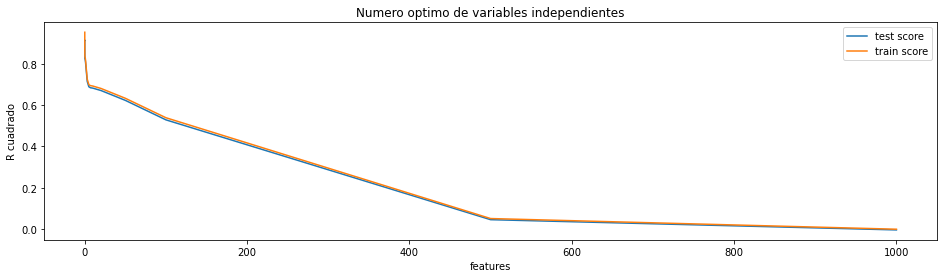

In [114]:
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('features')
plt.ylabel('R cuadrado')
plt.title("Numero optimo de variables independientes")
plt.legend(['test score', 'train score'], loc='upper right')

In [115]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.07850649703280731


In [116]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [117]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.911138511950464


In [118]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print("R2 Train Score: ", r2_train_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
print("Mean Squared Train Error Train: ", mse_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
print("Mean Squared Train Error Test: ", mse_test_lasso)

R2 Train Score:  0.9484161589957895
Mean Squared Train Error Train:  0.007804579086628585
Mean Squared Train Error Test:  0.01485908049544448


# 8. Conclusiones y Observaciones